In [13]:
import csv
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import matthews_corrcoef as MC
from sklearn.metrics import ConfusionMatrixDisplay as CMD
import matplotlib.pyplot as plt
from collections import Counter as Cnt
#matthews corrcoef https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
#TODO
# use matthews corrcoef
# 

# NOTES
max100 states has the following "issues"

New Hampshire has 0 and District of Columbia is included with 100

'Oklahoma': 73,'Vermont': 7,'Nebraska': 68,'Maine': 92

In [52]:
# result_file = "country100_results.csv"
# result_file =  "US_states_max100_results.csv"
# result_file = "city100_results.csv"
result_file = "country100_results_test.csv"



In [53]:
labelspair = []
counter = 0
with open(f'../resultcsv/{result_file}', encoding="utf-8",newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        if row[0]=="Gold":
            continue
        gold = row[0]
        preds = row[1][2:-2].split(", ")
        preds = [x.strip("'") for x in preds]
        probs = row[2][2:-2].split(", ")
        probs = [float(x) for x in probs]
        filename = row[3]
        labelspair.append([gold,preds,probs,filename])


In [55]:
labelspair[0][3]

'I2bZIA3vJauI6rm_OV3Z7w'

In [29]:
gold = [x[0] for x in labelspair]
predict = [x[1] for x in labelspair]
len(set(predict))

626

In [17]:
MC(gold,predict)

0.20459929804282875

Matthews corrcoef

country100: 0.51

US States 100: 0.42

City 100: 0.20



In [27]:
acc_list = {}
for g, p in zip(gold,predict):
    if g == p:
        acc_list.setdefault(g,0)
        acc_list[g]+=1
acc_list = [(x,y) for x,y in acc_list.items()]
acc_list.sort(reverse=True,key=lambda x : x[1])


In [28]:
acc_list

[('Vancouver', 97),
 ('St Davids', 96),
 ('Varanasi', 95),
 ('Mianyang City', 92),
 ('New Orleans', 92),
 ('Daegu', 90),
 ('Daly City', 90),
 ('Rangpur', 90),
 ('Geelong CBD', 90),
 ('Cork', 90),
 ('Paramaribo', 89),
 ('Ayia Napa', 89),
 ('San Donato Milanese', 89),
 ('Tucumcari City Limit', 88),
 ('Palm Springs', 87),
 ('Moncton', 86),
 ('Glasgow', 86),
 ('Rome', 85),
 ('Dublin', 85),
 ('Hayward', 83),
 ('Bouaké', 82),
 ('Sestriere', 82),
 ('Stara Pazova Municipality', 81),
 ('Basra', 81),
 ('Boston', 80),
 ('Shangri-La', 80),
 ('Christchurch', 80),
 ('Amritsar', 79),
 ('Pompei', 79),
 ('Muharraq', 78),
 ('London', 78),
 ('Juneau', 77),
 ('Baltimore', 77),
 ('Soweto', 77),
 ('Mysuru', 77),
 ('Ulaanbaatar', 76),
 ('Medicine Hat', 75),
 ('Canberra', 75),
 ('Las Condes', 73),
 ('Bend', 72),
 ('Tauranga', 72),
 ('El Alto', 70),
 ('Shillong', 70),
 ('York', 69),
 ('Cardiff', 69),
 ('South Lakeland', 69),
 ('Richardson', 68),
 ('Anaheim', 68),
 ('Suwałki', 67),
 ('Chester', 67),
 ('Örebro',

In [22]:
# Cnt(gold) # For states t

In [23]:
#print(set(gold))

In [21]:
# Select specific labels to display and focus on. Other values are changed to label "other"
# selection = ['China', 'Japan', 'Sri Lanka','Australia','United Kingdom','Egypt','United States','Kosovo','Cyprus',"France"]
# selection = ['South Korea', 'Democratic Republic of the Congo', 'Nigeria', 'Haiti', 'Mozambique', 'Nicaragua', 'Luxembourg', 'Saint Lucia', 'Namibia', 'Barbados','United States', 'Australia', 'Japan', 'Brazil', 'Germany', 'Morocco', 'Thailand', 'France', 'South Africa', 'Colombia']
# selection = ['Belgium','South Korea', 'Democratic Republic of the Congo', 'Nigeria', 'Haiti', 'Mozambique', 'Nicaragua', 'Luxembourg', 'Saint Lucia', 'Namibia', 'Barbados','United States', 'Australia', 'Japan', 'Brazil', 'Germany', 'Morocco', 'Thailand', 'France', 'South Africa', 'Colombia']
selection = ["Namibia", 'Botswana', 'Zambia', 'Angola', 'South Africa', 'Zimbabwe', 'Mozambique','Democratic Republic of the Congo','Kenya','Ethiopia','Nigeria','Egypt']
selection = ['Dubai','Abu Dhabi', 'Buenos Aires', 'Bangkok', 'Rio de Janeiro',  'Helsingborg','Boston', 'Detroit','Hamburg','Singapore','Berlin','Sydney','Rome','Los Angeles','Kyoto','Tokyo','New York'] 
# selection = ['Vermont', 'Alabama', 'Pennsylvania', 'Louisiana', 'North Carolina', 'Hawaii', 'New Mexico', 'Arizona', 'Minnesota', 'Missouri','New York']
goldsel = []
predsel = []
for g, p in zip(gold,predict):
   
    if g in selection:
        if p in selection:
            goldsel.append(g)
            predsel.append(p)
        else:
            p = "other"
            goldsel.append(g)
            predsel.append(p)
    else:
        g = "other"
        if p in selection:
            goldsel.append(g)
            predsel.append(p)
        else:
            continue
            #These are commented out to avoid saturation of "other" in confusion matrix
#             p = "other"
#             goldsel.append(g)
#             predsel.append(p)



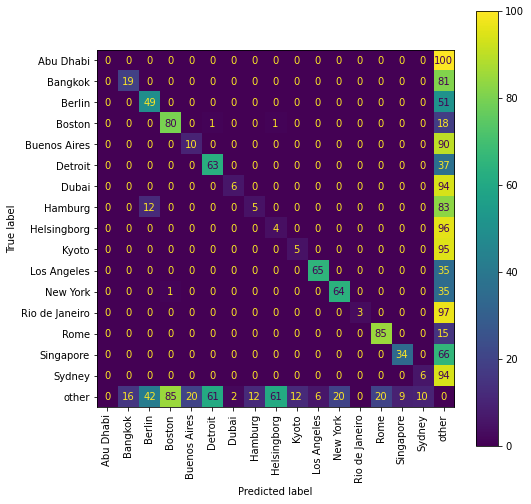

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax)
# plt.savefig("topbot10_count_CM_wbelg.png")

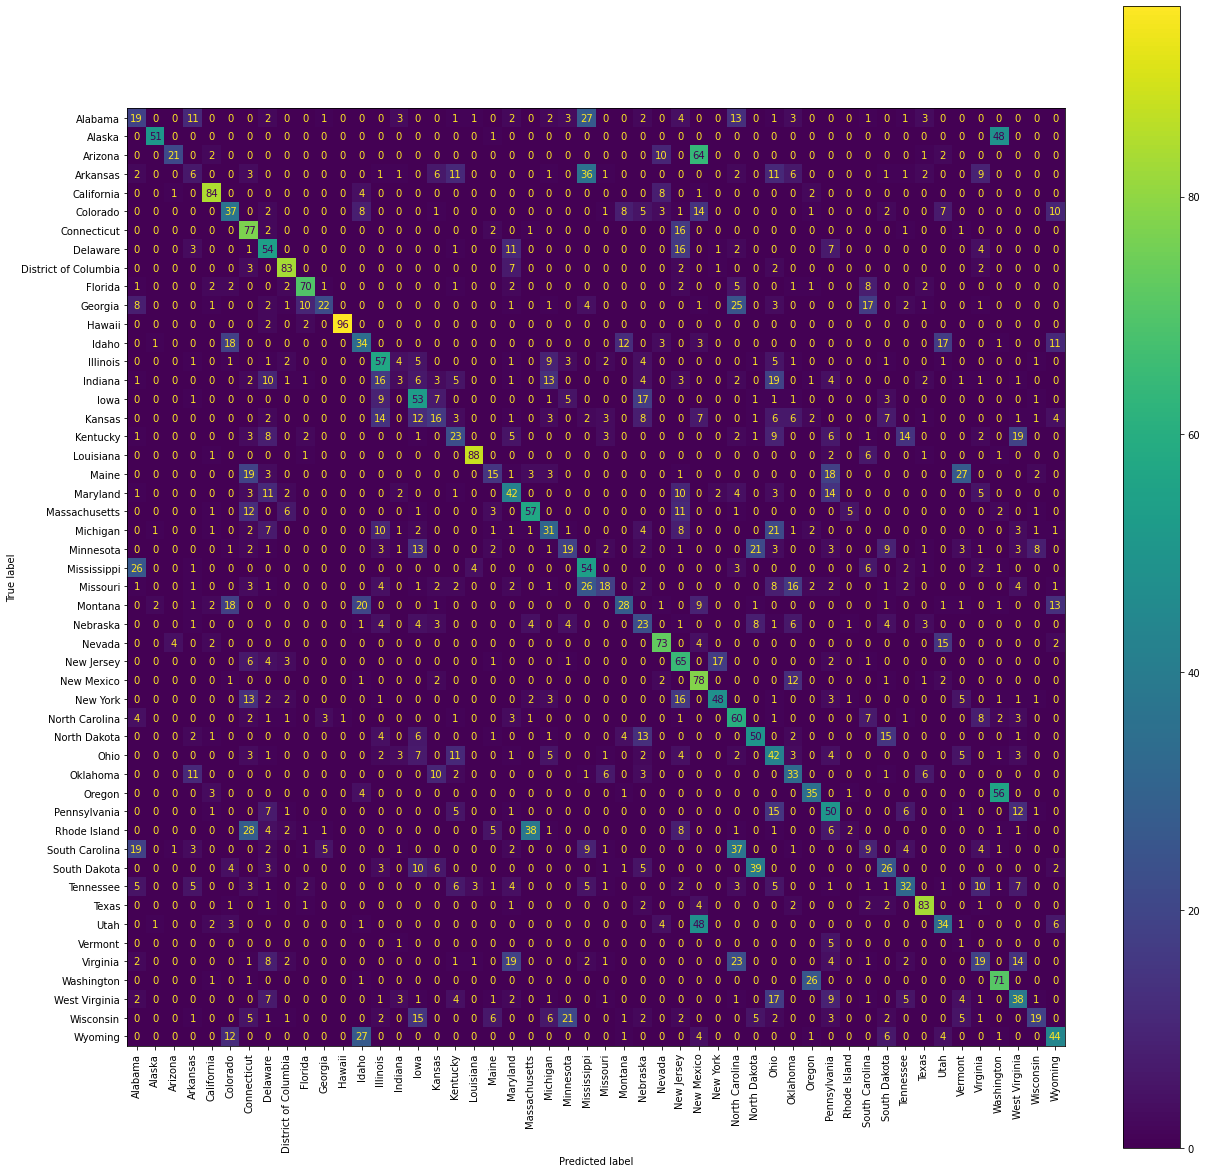

In [35]:


fig, ax = plt.subplots(figsize=(21, 21))

CMD.from_predictions(gold,predict,xticks_rotation="vertical",ax=ax)#
# plt.savefig("allstate_CM.png")

In [38]:
# Select specific label to display and focus on. Other values are changed to label "other"
selection = "Namibia"
goldsel = []
predsel = []
for g, p in zip(gold,predict):
   
    if g == selection:
        goldsel.append(g)
        predsel.append(p)
    else:
        g = "other"
        if p == selection:
            goldsel.append(g)
            predsel.append(p)
        else:
            continue
            #These are commented out to avoid saturation of "other" in confusion matrix
#             p = "other"
#             goldsel.append(g)
#             predsel.append(p)



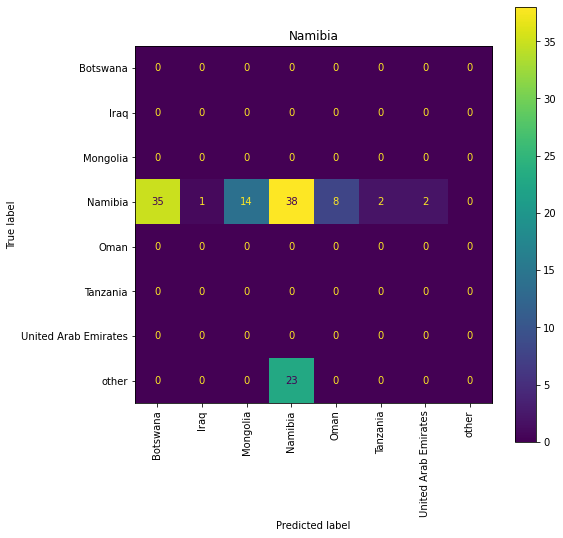

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title(selection)

CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax)